In [142]:
# Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.api as sm

Text(0.5, 1.0, 'Logistic Function')

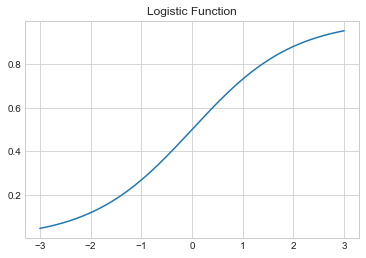

In [143]:
# Check logistic function on wiki:::
# https://en.wikipedia.org/wiki/Logistic_function

def logisticFunc(t):
    return 1.0 / (1+ math.exp((-1.0)*t))

# Let's create the timestep for our model

t = np.linspace(-3,3,500)
#Create our array with outcomes for elements in t.
y = np.array([logisticFunc(ele) for ele in t]) 

# 
plt. plot(t,y)
plt.title("Logistic Function")


In [144]:
# Let's do a tutorial with statsmodels dataset

DF = sm.datasets.fair.load_pandas().data

DF.head(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [145]:
# Let's check if they have children or not
def child_Check(x):
    if x != 0:
        return 1
    else:
        return 0
# Let's check if they have affairs or not
def affair_Check(x):
    if x != 0:
        return 1
    else:
        return 0

In [146]:
DF['Had_Children']= DF["children"].apply(child_Check)
DF['Had_Affair'] = DF['affairs'].apply(affair_Check)
DF.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Children,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,1


In [147]:
DF.groupby("Had_Affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Children
Had_Affair,,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000,0.556689
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243,0.755480


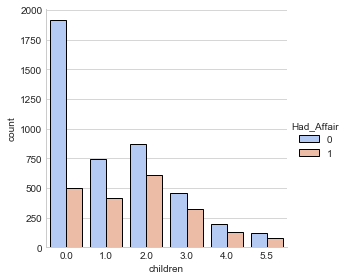

In [148]:
sns.factorplot(x="children", data=DF, hue="Had_Affair",kind="count",ec="black",palette="coolwarm")

In [149]:
# Dummies for Categorical Variables
# For instance We have created a new dummy above for work

occ_dummies = pd.get_dummies(DF['occupation'])
hus_occ_dummies = pd.get_dummies(DF['occupation_husb'])
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [150]:
#Name the columns name for categories in the new columns.
# 

occ_dummies.columns = ['student','farmer','semi-skilled','skilled','worker','unemployed']
hus_occ_dummies.columns = ['hstudent','hfarmer','hsemi-skilled','hskilled','hworker','hunemployed']
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)
dummies.head()

,student,farmer,semi-skilled,skilled,worker,unemployed,hstudent,hfarmer,hsemi-skilled,hskilled,hworker,hunemployed
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [151]:
#Let's create new dataframe from our values

X = DF.drop(['occupation','occupation_husb','Had_Affair',"Had_Children"],axis=1)

#Axis=1 because im orking on columns
X = pd.concat([X,dummies],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,student,farmer,semi-skilled,skilled,worker,unemployed,hstudent,hfarmer,hsemi-skilled,hskilled,hworker,hunemployed
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [152]:
# Let's analyze error 
# Since we have disaggregated the occupations, 
# Now every column will be perfectly correlated when analyzing. 
# We can drop a column and calculate the effect

# Multicollinearity

X = X.drop("student",axis=1)
X = X.drop("hstudent",axis=1)

#Repeat of target
X = X.drop("affairs",axis=1)

X.head()



,rate_marriage,age,yrs_married,children,religious,educ,farmer,semi-skilled,skilled,worker,unemployed,hfarmer,hsemi-skilled,hskilled,hworker,hunemployed
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [153]:
Y = DF.Had_Affair
#Transform series into array for scikit

Y=np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [154]:
# On X axis, we have parameters to predict
# On Y axis we have the Desired Outcome to chec parameters
# Let's do a model fit using Logistic Regression

log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

# Score means %72 accuracy rating
#Let's compare our results with the previous target now!!

0.72588752748978946

In [155]:
#Percentage that had Affair
Y.mean()

# Meaning 1-0.32= 0.68
# Then real result should have been 0.68 instead of 0.72

0.32249450204209867

In [163]:
# Let's check the coefficients to check our accuracy

coeff_df = DataFrame(list(zip(X.columns,np.transpose(log_model.coef_))))
coeff_df

,0,1
0,rate_marriage,[-0.697993156038]
1,age,[-0.0563826599784]
2,yrs_married,[0.103916850659]
3,children,[0.0181800154977]
4,religious,[-0.368666342905]
5,educ,[0.00863221149728]
6,farmer,[0.300737598166]
7,semi-skilled,[0.611147324791]
8,skilled,[0.34967499164]
9,worker,[0.945794294756]


In [171]:
#Create our test and training sets

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

log_model2 = LogisticRegression()

#We have created our new training model here 
# We will use this models accuracy
log_model2.fit(X_train,Y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [172]:
#We can use predict function to predict X_test data set
#Our accuracy will be reevaluated

prediction = log_model2.predict(X_test)

# 
print(metrics.accuracy_score(Y_test,prediction))

0.718592964824


In [ ]:
#Our previous accuracy was:
#0.72588752748978946
# Now it is
#0.718592964824

#Fairly same accuracy score for 